# Happiness and Freedom of Movement

## An examination of how happiness correlates to freedom.

##### Analysis derived from data using the most recent World Happiness Report and Human Freedom Index.

"The secret to happiness is freedom... and the secret to freedom is courage." - Thucydides ([wikipedia](https://en.wikipedia.org/wiki/Thucydides))

It seems obvious that freedom leads to happiness but how much and how do different kinds of freedoms contribute to the overall picture?

### Statements to consider

##### General

* Freedom is positively correlated with happiness.
* How do personal and economic freedoms affect happiness?

#### Happiness in relation to individual freedom of movement

* How does movement affect happiness?
* How does gender affect freedom of movement?

##### Happiness and relative geographic isolation

* How does geographic isolation affect freedom of movement?
* How does geographic isolation affect happiness?

* People in land-locked countries are less happy than others considering all other factors.
* How does happiness in land-locked countries compare to coastal countries in terms of various freedoms. (Movement, economic, violence, religion, women's rights)

##### Happiness with relation to religious and gender freedom (personal freedom of movement)

* People in countries with reduced religious freedom and women's moveement are less happy than others.


In [8]:
# imports
import sqlite3
import sqlalchemy as sa
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from scipy.stats import linregress

# create sqlite database and path
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Happiness_Freedom.db')

# set seaborn default theme
sns.set_palette("muted")

# multiple outputs from single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
# create dataframes for each report from csv
hfi_file = pd.read_csv("hfi_cc_2018.csv")
hfi = pd.DataFrame(hfi_file)

whr_file = pd.read_csv("whr_2017.csv")
whr = pd.DataFrame(whr_file)

# create database and tables from dataframe
hfi.to_sql("Human Freedom Index", con=engine, if_exists="replace")
whr.to_sql("World Happiness Report", con=engine, if_exists="replace")

# view info for each dataframe
hfi.info()
whr.info()

hfi.columns[:100]
hfi.columns[101:]

whr.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap', 'pf_ss_disappearances_violent',
       'pf_ss_disappearances_organized', 'pf_ss_disappearances_fatalities',
       'pf_ss_disappearances_injuries', 'pf_ss_disappearances',
       'pf_ss_women_fgm', 'pf_ss_women_missing',
       'pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters',
       'pf_ss_women_inheritance', 'pf_ss_women', 'pf_ss',
       'pf_movement_domestic', 'pf_movement_foreign', 'pf_movement_women',
       'pf_movement', 'pf_religion_estop_establish',
       'pf_religion_estop_operate', 'pf_religion_estop',
       'pf_religion_harassment', 'pf_religion_restrictions', 'pf_religion',
       'pf_association_association', 'pf_association_assembly',
       'pf_association_political_establish',
       'pf_association_political_operate', 'pf_association_political',
       'pf_association_p

Index(['ef_regulation_credit_interest', 'ef_regulation_credit',
       'ef_regulation_labor_minwage', 'ef_regulation_labor_firing',
       'ef_regulation_labor_bargain', 'ef_regulation_labor_hours',
       'ef_regulation_labor_dismissal', 'ef_regulation_labor_conscription',
       'ef_regulation_labor', 'ef_regulation_business_adm',
       'ef_regulation_business_bureaucracy', 'ef_regulation_business_start',
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object')

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

### Happiness is directly correlated with freedom

Let's start with a quick sanity check and make sure the happiness and freedom have a strong positive relationship.

In [10]:
# get overall freedom score by country from World Freedom Report
hf_score_by_country = hfi[["countries", "hf_score"]]

# get overall happiness score by country from Happiness Index
wh_score_by_country = whr[["Country", "Happiness.Score"]]
# rename "Country" column to "countries" to merge on conat with freedom index
wh_score_by_country.columns = ["countries", "hp_score"]

# coombine the two dataframes
reports_combined = pd.concat([hf_score_by_country, wh_score_by_country], sort=False)
reports_grouped = reports_combined.groupby("countries")["hf_score", "hp_score"].mean()
hf_wh_scores = reports_grouped.dropna()

# resultant dataframe is freedom and happiness scores by country
hf_wh_scores.head(5)

,hf_score,hp_score
countries,,
Albania,7.522911,4.644
Algeria,5.140803,5.872
Angola,5.499577,3.795
Argentina,6.677056,6.599
Armenia,7.413269,4.376


Text(0.5,1,'Correlation of Happiness and Freedom')

Text(0.5,0,'Happiness')

Text(0,0.5,'Freedom')

LinregressResult(slope=0.5834883909299581, intercept=3.8100722812491594, rvalue=0.6330361581269445, pvalue=1.7569182578216024e-16, stderr=0.061871040490376464)

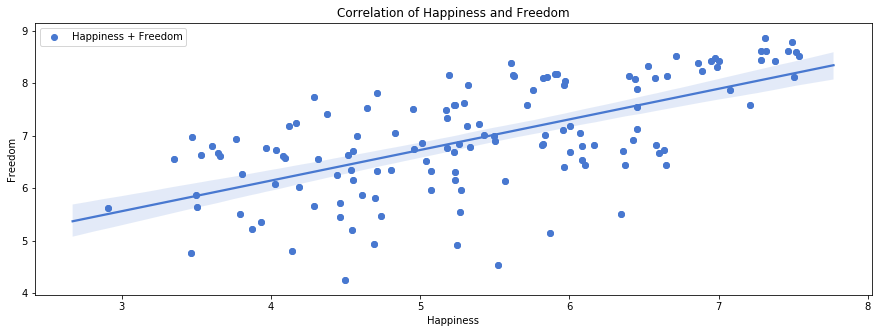

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hp_score", y="hf_score", data=hf_wh_scores)
points = plt.scatter(hf_wh_scores["hp_score"], hf_wh_scores["hf_score"], label="Happiness + Freedom")
ax.set_title("Correlation of Happiness and Freedom")
ax.set_xlabel("Happiness")
ax.set_ylabel("Freedom")
ax.legend();

x = hf_wh_scores["hp_score"]
y = hf_wh_scores["hf_score"]
linregress(x,y)

As expected, reported happiness and freedom are positively correlated in a linear fashion. The relationship seems moderate but may be so due to the lower quartile of the freedom scores raising the starting point.

Slope = 0.58  
Correlation Coefficient = 0.63

In [12]:
hf_score_by_country.hf_score.describe()
wh_score_by_country.hp_score.describe()

count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64

count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: hp_score, dtype: float64

### Happiness, Personal, and Economic Freedom

How does personal freedom affect happiness?

How does economic freedom affect happiness?

In [13]:
# get personal and economic freedom scores by country from World Freedom Report
pf_ef_score_by_country = hfi[["countries", "pf_score", "ef_score"]]

# coombine the two dataframes
reports_combined = pd.concat([pf_ef_score_by_country, wh_score_by_country], sort=False)
reports_grouped = reports_combined.groupby("countries")["pf_score", "ef_score", "hp_score"].mean()
pf_ef_scores = reports_grouped.dropna()

# cleaned dataframe
pf_ef_scores.head(5)

,pf_score,ef_score,hp_score
countries,,,
Albania,7.696934,7.348889,4.644
Algeria,5.249383,5.032222,5.872
Angola,5.856932,5.142222,3.795
Argentina,8.120779,5.233333,6.599
Armenia,7.192095,7.634444,4.376


Text(0.5,1,'CHappiness and Personal Freedom')

Text(0.5,0,'Happiness')

Text(0,0.5,'Personal Freedom')

Text(0.5,1,'Happiness and Economic Freedom')

Text(0.5,0,'Happiness')

Text(0,0.5,'Economic Freedom')

LinregressResult(slope=0.7273926920268359, intercept=3.2231997032082442, rvalue=0.5904565197157343, pvalue=4.8011190014548e-14, stderr=0.08621167822362827)

LinregressResult(slope=0.4395840898325166, intercept=4.396944859299557, rvalue=0.5769568558547652, pvalue=2.4067155502762765e-13, stderr=0.053960385404963195)

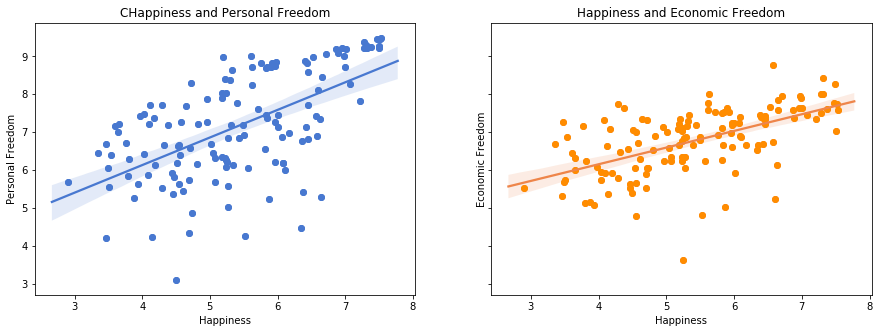

In [25]:
# regplot of happiness, personal freedom and economic freedom scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.regplot(x="hp_score", y="pf_score", data=pf_ef_scores, ax=ax1)
sns.regplot(x="hp_score", y="ef_score", data=pf_ef_scores, ax=ax2)
points1 = ax1.scatter(pf_ef_scores["hp_score"], pf_ef_scores["pf_score"], label="Happiness and Personal Freedom")
points2 = ax2.scatter(pf_ef_scores["hp_score"], pf_ef_scores["ef_score"], c="darkorange", label="Happiness and Economic Freedom")
ax1.set_title("CHappiness and Personal Freedom")
ax1.set_xlabel("Happiness")
ax1.set_ylabel("Personal Freedom")
ax2.set_title("Happiness and Economic Freedom")
ax2.set_xlabel("Happiness")
ax2.set_ylabel("Economic Freedom")

x = pf_ef_scores["hp_score"]
y = pf_ef_scores["pf_score"]
linregress(x,y)

x = pf_ef_scores["hp_score"]
y = pf_ef_scores["ef_score"]
linregress(x,y)

Both personal and economic freedom have a moderate to strong influence on happiness.

Personal Freedom:
* Slope: 0.73
* Corr. Coef: 0.59

Economic Freedom:
* Slope: 0.44
* Corr. Coef: 0.58

In [15]:
pf_ef_scores.head(3)
pf_ef_scores.describe()

,pf_score,ef_score,hp_score
countries,,,
Albania,7.696934,7.348889,4.644
Algeria,5.249383,5.032222,5.872
Angola,5.856932,5.142222,3.795


,pf_score,ef_score,hp_score
count,135.000000,135.000000,135.000000
mean,7.156347,6.773857,5.407185
std,1.397562,0.864348,1.134462
min,3.116028,3.634444,2.905000
25%,6.197193,6.233333,4.540000
50%,7.160391,6.890000,5.311000
75%,8.400550,7.403889,6.350500
max,9.476455,8.778889,7.537000


,hf_score,hp_score,pf_association,pf_expression,pf_identity,pf_movement,pf_rank,pf_religion,pf_rol,pf_score,pf_ss
countries,,,,,,,,,,,
Albania,7.511432,4.644,9.597222,8.646825,8.194444,6.666667,57.000000,9.306358,4.885893,7.646198,8.734292
Algeria,5.140803,5.872,4.388889,7.187741,0.925926,4.629630,142.666667,4.893601,4.185818,5.249383,8.001402
Angola,5.499577,3.795,3.037037,6.874736,5.092593,4.074074,123.000000,7.635638,4.474387,5.856932,8.267712


Text(0.5,0.98,'Happiness and Personal Freedoms')

Text(0.5,0,'Happiness')

Text(0,0.5,'Personal Freedom')

Text(0.5,0,'Happiness')

Text(0,0.5,'Rule of Law')

Text(0.5,0,'Happiness')

Text(0,0.5,'Safety and Security')

Text(0.5,0,'Happiness')

Text(0,0.5,'Movement')

Text(0.5,0,'Happiness')

Text(0,0.5,'Religion')

Text(0.5,0,'Happiness')

Text(0,0.5,'Association, Assembly, and Civil Society')

Text(0.5,0,'Happiness')

Text(0,0.5,'Expression and Information')

Text(0.5,0,'Happiness')

Text(0,0.5,'Identity and Relationships')

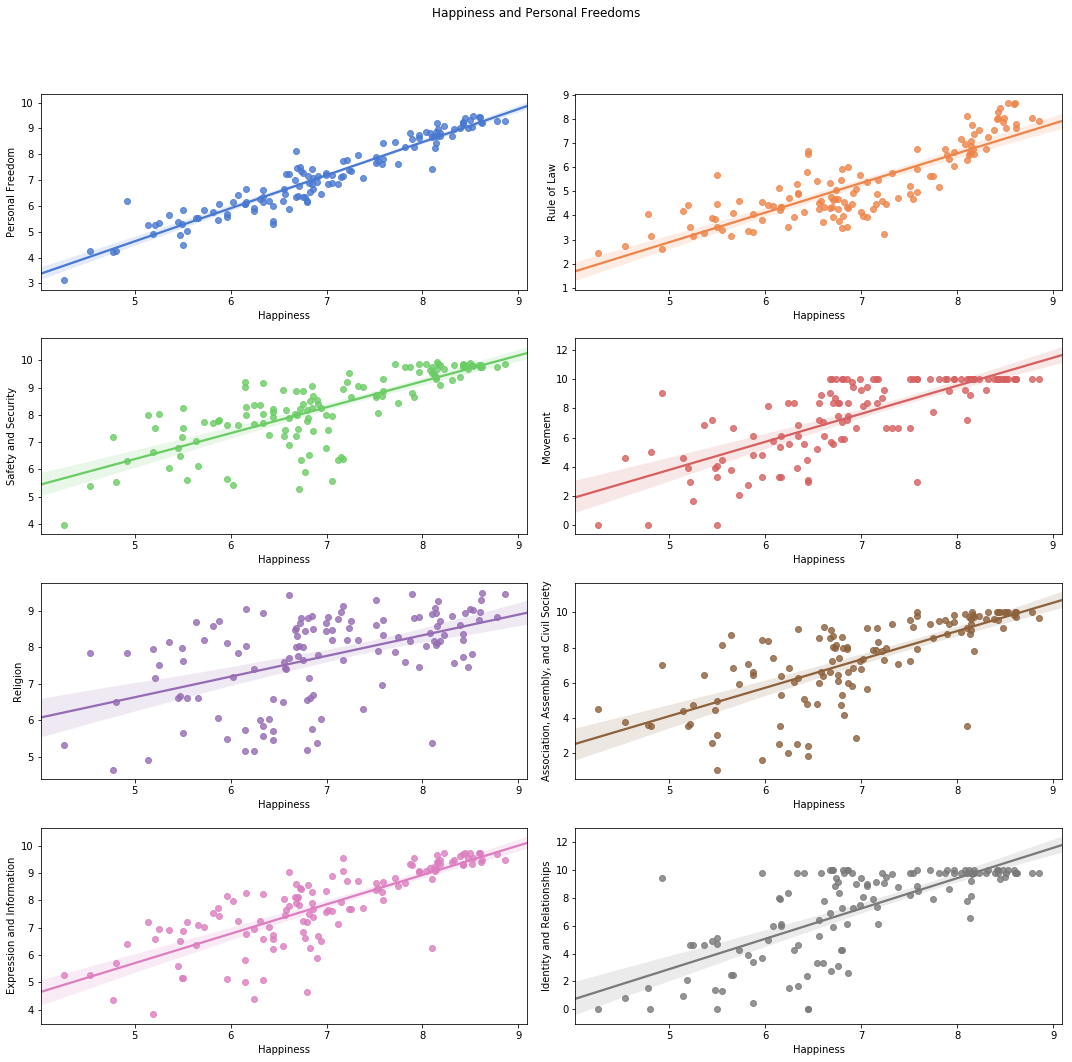

In [91]:
# Each personal freedom top level category
hfiTopLevelRaw = hfi[['countries', 'hf_score', 'pf_rol', 'pf_ss', 'pf_movement', 'pf_religion', 'pf_association', 'pf_expression', 'pf_identity', 'pf_score', 'pf_rank']]
hfiTopLevelCleaned = hfiTopLevelRaw.dropna()
hfiTopLevel = hfiTopLevelCleaned.sort_values(by='pf_rank')

# coombine the two dataframes grouping by county and dropping null values
hp_pf_combined = pd.concat([hfiTopLevel, wh_score_by_country], sort=True)
hp_pf_grouped = hp_pf_combined.groupby("countries").mean()
hp_pf = hp_pf_grouped.dropna()
hp_pf.head(3)

# plot of happiness freedom and personal freedom subtypes
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
fig.suptitle("Happiness and Personal Freedoms")

sns.regplot(x="hf_score", y="pf_score", data=hp_pf, ax=axes[0,0])
sns.regplot(x="hf_score", y="pf_rol", data=hp_pf, ax=axes[0,1])
axes[0,0].set_xlabel("Happiness")
axes[0,0].set_ylabel("Personal Freedom")
axes[0,1].set_xlabel("Happiness")
axes[0,1].set_ylabel("Rule of Law")

sns.regplot(x="hf_score", y="pf_ss", data=hp_pf, ax=axes[1,0])
sns.regplot(x="hf_score", y="pf_movement", data=hp_pf, ax=axes[1,1])
axes[1,0].set_xlabel("Happiness")
axes[1,0].set_ylabel("Safety and Security")
axes[1,1].set_xlabel("Happiness")
axes[1,1].set_ylabel("Movement")

sns.regplot(x="hf_score", y="pf_religion", data=hp_pf, ax=axes[2,0])
sns.regplot(x="hf_score", y="pf_association", data=hp_pf, ax=axes[2,1])
axes[2,0].set_xlabel("Happiness")
axes[2,0].set_ylabel("Religion")
axes[2,1].set_xlabel("Happiness")
axes[2,1].set_ylabel("Association, Assembly, and Civil Society")

sns.regplot(x="hf_score", y="pf_expression", data=hp_pf, ax=axes[3,0])
sns.regplot(x="hf_score", y="pf_identity", data=hp_pf, ax=axes[3,1])
axes[3,0].set_xlabel("Happiness")
axes[3,0].set_ylabel("Expression and Information")
axes[3,1].set_xlabel("Happiness")
axes[3,1].set_ylabel("Identity and Relationships")

plt.tight_layout()
fig.subplots_adjust(top=0.9)


In [94]:
# slope and correlation coefficient of happiness and personal freedom
x = hp_pf["hp_score"]
y = hp_pf["pf_score"]
linregress(x,y)

# slope and correlation coefficient of happiness and rule of law
x = hp_pf["hp_score"]
y = hp_pf["pf_rol"]
linregress(x,y)

# slope and correlation coefficient of happiness and safety and security
x = hp_pf["hp_score"]
y = hp_pf["pf_ss"]
linregress(x,y)

# slope and correlation coefficient of happiness and movement
x = hp_pf["hp_score"]
y = hp_pf["pf_movement"]
linregress(x,y)

# slope and correlation coefficient of happiness and religion
x = hp_pf["hp_score"]
y = hp_pf["pf_religion"]
linregress(x,y)

# slope and correlation coefficient of happiness and association, assembly, and civil society
x = hp_pf["hp_score"]
y = hp_pf["pf_association"]
linregress(x,y)

# slope and correlation coefficient of happiness and expression and information
x = hp_pf["hp_score"]
y = hp_pf["pf_expression"]
linregress(x,y)

# slope and correlation coefficient of happiness and identity and relationships
x = hp_pf["hp_score"]
y = hp_pf["pf_identity"]
linregress(x,y)

LinregressResult(slope=0.7636193990026241, intercept=2.9923041489237088, rvalue=0.6040153962848803, pvalue=4.4258228174790305e-14, stderr=0.08976087712312512)

LinregressResult(slope=0.9789073988024138, intercept=-0.015906189100093115, rvalue=0.7141489422965056, pvalue=2.990674396433896e-21, stderr=0.08547945025789581)

LinregressResult(slope=0.5525021394654176, intercept=5.2430576381877625, rvalue=0.47480012725507825, pvalue=1.4929626955929245e-08, stderr=0.09123610873919118)

LinregressResult(slope=0.9867861440562241, intercept=2.1946584542405905, rvalue=0.4171563227037659, pvalue=9.65709798471237e-07, stderr=0.1915242912613525)

LinregressResult(slope=0.17011051716954967, intercept=6.816944489574257, rvalue=0.15955172053151812, pvalue=0.07202557542989964, stderr=0.0937659070435024)

LinregressResult(slope=0.8029570371807402, intercept=2.901732071913303, rvalue=0.3820964026005794, pvalue=8.563369744181416e-06, stderr=0.17300697687568306)

LinregressResult(slope=0.5639807148347433, intercept=4.746066912661645, rvalue=0.4468126638142697, pvalue=1.2445335746662996e-07, stderr=0.10059948858835628)

LinregressResult(slope=1.2838357309832629, intercept=0.19576093881261958, rvalue=0.45745928863151136, pvalue=5.6800425635965134e-08, stderr=0.22232388255860802)

Text(0.5,1,'Correlation of General Freedom and Movement Freedom')

Text(0.5,0,'General Freedom')

Text(0,0.5,'Movement Freedom')

(0, 11)

LinregressResult(slope=1.6231675623339477, intercept=-3.272135871795779, rvalue=0.7067331136210753, pvalue=1.2236363262144392e-22, stderr=0.13782082205149696)

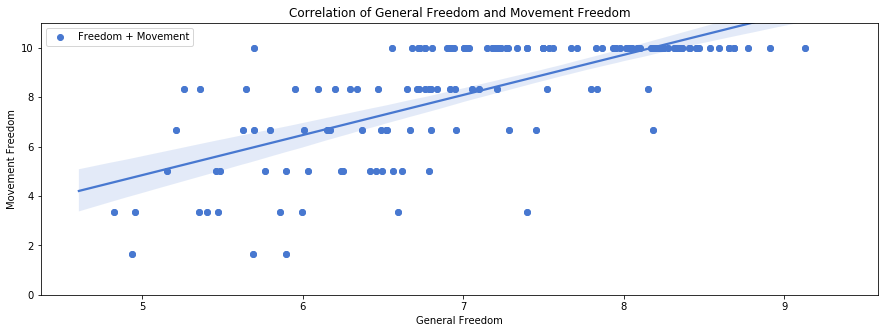

In [17]:
# retrieve movement and freedom data from Human Freedom Index grouped by country and ordered by freedom score
hfi_movement_and_freedom_data = "SELECT hf_score, pf_movement FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_movement_and_freedom_raw = pd.read_sql(hfi_movement_and_freedom_data, con=engine)
hfi_movement_and_freedom = hfi_movement_and_freedom_raw.dropna()

# scatter plot analysis with linear regression
fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="pf_movement", data=hfi_movement_and_freedom)
points = plt.scatter(hfi_movement_and_freedom["hf_score"], hfi_movement_and_freedom["pf_movement"], label="Freedom + Movement")
ax.set_title("Correlation of General Freedom and Movement Freedom")
ax.set_xlabel("General Freedom")
ax.set_ylabel("Movement Freedom")
ax.set_ylim(0,11)
ax.legend()

x = hfi_movement_and_freedom["hf_score"]
y = hfi_movement_and_freedom["pf_movement"]

linregress(x,y)

Slope = 1.62   
Correlation Coefficient = 0.71

## Happiness and Movement Freedom

There is a positive linear relationship between general freedom and personal freedom of movement.

Text(0.5,1,'Correlation of General Happiness and Movement Freedom')

Text(0.5,0,'General Happiness')

Text(0,0.5,'Movement Freedom')

LinregressResult(slope=0.8461675980986779, intercept=3.5814992939975614, rvalue=0.40541698471898024, pvalue=3.291577106102611e-06, stderr=0.17344852664244792)

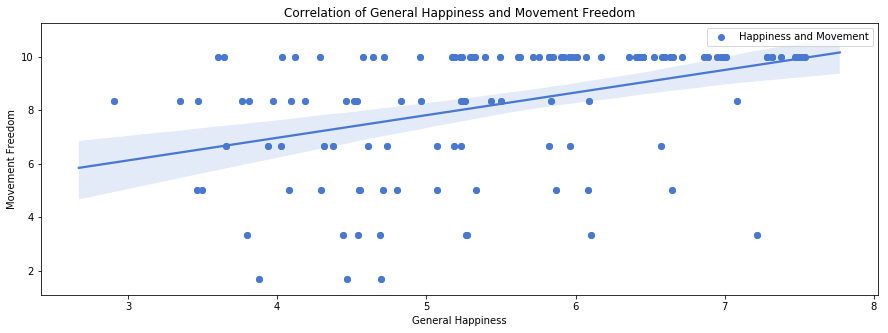

In [18]:
# Happiness and Movement Freedom

# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score

hfi_movement_by_country_data = "SELECT countries, pf_movement FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_movement_by_country_raw = pd.read_sql(hfi_movement_by_country_data, con=engine)
hfi_movement_by_country = hfi_movement_by_country_raw.dropna()

# retrieve happiness score data from World Happiness Report groupd by country and ordered by happiness score

whr_happiness_by_country_data = "SELECT Country as countries, `Happiness.Score` as hp_score FROM 'World Happiness Report' GROUP BY countries ORDER BY hp_score DESC"
whr_happiness_by_country_raw = pd.read_sql(whr_happiness_by_country_data, con=engine)
whr_happiness_by_country = whr_happiness_by_country_raw.dropna()

# coombine the two dataframes grouping by county and dropping null values

hfi_movement_whr_happiness_by_country_combined = pd.concat([hfi_movement_by_country, whr_happiness_by_country], sort=True)
hfi_movement_whr_happiness_by_country_grouped = hfi_movement_whr_happiness_by_country_combined.groupby("countries")["pf_movement", "hp_score"].mean()
hfi_movement_whr_happiness_by_country = hfi_movement_whr_happiness_by_country_grouped.dropna()

# scatter plot analysis with linear regression

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hp_score", y="pf_movement", data=hfi_movement_whr_happiness_by_country)
points = plt.scatter(hfi_movement_whr_happiness_by_country["hp_score"], hfi_movement_whr_happiness_by_country["pf_movement"], label="Happiness and Movement")
ax.set_title("Correlation of General Happiness and Movement Freedom")
ax.set_xlabel("General Happiness")
ax.set_ylabel("Movement Freedom")
ax.legend()

x = hfi_movement_whr_happiness_by_country["hp_score"]
y = hfi_movement_whr_happiness_by_country["pf_movement"]
linregress(x,y)

Slope = 0.85   
Correlation Coefficient = 0.41

# Human Freedom and Economic Freedom

There is a positive linear relationship between general freedom and personal freedom of movement.

Slope = 0.82   
Correlation Coefficient = 0.90

Text(0.5,1,'Correlation of General Freedom and Economic Freedom')

Text(0.5,0,'General Freedom')

Text(0,0.5,'Economic Freedom')

LinregressResult(slope=0.8236051482820463, intercept=0.9304318156474416, rvalue=0.9020826394199858, pvalue=4.083315414486082e-51, stderr=0.03391176418235248)

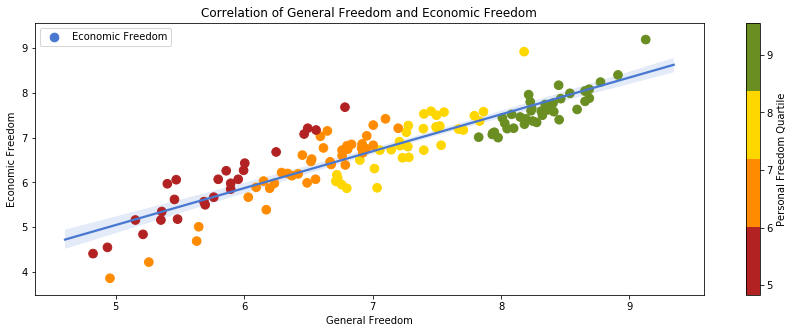

In [19]:
# retrieve movement data from Human Freedom Index grouped by country and ordered by movement score

hfi_freedom_and_economy_data = "SELECT countries, hf_score, ef_score, pf_score, pf_movement_women FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"
hfi_freedom_and_economy_raw = pd.read_sql(hfi_freedom_and_economy_data, con=engine)
hfi_freedom_and_economy = hfi_freedom_and_economy_raw.dropna()

# scatter plot analysis with linear regression
fig, ax = plt.subplots(figsize=(15, 5))
colorsList = ["firebrick", "darkorange", "gold", "olivedrab"]
colors = matplotlib.colors.ListedColormap(colorsList)
sns.regplot(x="hf_score", y="ef_score", data=hfi_freedom_and_economy)
points = plt.scatter(hfi_freedom_and_economy["hf_score"], hfi_freedom_and_economy["ef_score"], c=hfi_freedom_and_economy["pf_score"], s=75, cmap=colors, label="Economic Freedom")
cbar = plt.colorbar(points)
cbar.set_label("Personal Freedom Quartile")
ax.set_title("Correlation of General Freedom and Economic Freedom")
ax.set_xlabel("General Freedom")
ax.set_ylabel("Economic Freedom")
ax.legend()

x = hfi_freedom_and_economy["hf_score"]
y = hfi_freedom_and_economy["ef_score"]
linregress(x,y)

Text(0.5,1,'Correlation of General Freedom and Economic Freedom')

Text(0.5,0,'General Freedom')

Text(0,0.5,'Economic Freedom')

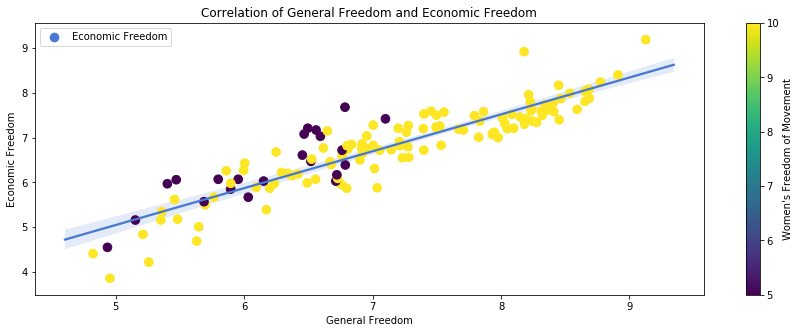

In [20]:
# examination as above but colored by women's personal freedome of movement (similar correlation)

fig, ax = plt.subplots(figsize=(15, 5))
sns.regplot(x="hf_score", y="ef_score", data=hfi_freedom_and_economy)
points = plt.scatter(hfi_freedom_and_economy["hf_score"], hfi_freedom_and_economy["ef_score"], c=hfi_freedom_and_economy["pf_movement_women"], s=75, cmap="viridis", label="Economic Freedom")
cbar = plt.colorbar(points)
cbar.set_label("Women's Freedom of Movement")
ax.set_title("Correlation of General Freedom and Economic Freedom")
ax.set_xlabel("General Freedom")
ax.set_ylabel("Economic Freedom")
ax.legend()


Text(0.5,1,'Freedom/Happiness in Landlocked vs non-Landlocked countries')

Text(0.5,0,'Freedom')

Text(0,0.5,'Happiness')

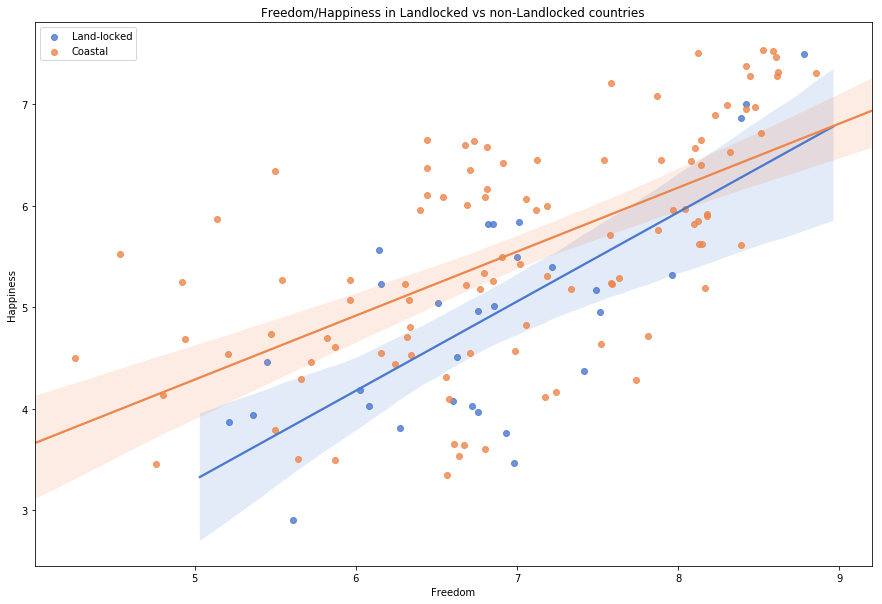

In [21]:
# get list of land locked countries

land_locked_countries = pd.Series(["Afghanistan", "Andorra", "Armenia", "Artsakh", "Austria", "Azerbaijan", "Belarus", "Bhutan", "Bolivia", "Botswana", "Burkina Faso", "Burundi", "Central African Republic", "Chad", "Czech Republic", "Ethiopia", "Hungary","Kazakhstan", "Kosovo", "Kyrgyzstan", "Laos", "Lesotho", "Liechtenstein", "Luxembourg", "Macedonia", "Malawi", "Mali", "Moldova", "Mongolia", "Nepal", "Niger", "Paraguay", "Rwanda", "San Marino" , "Serbia", "Slovakia", "South Ossetia", "South Sudan", "Swaziland", "Switzerland","Tajikistan", "Transnistria", "Turkmenistan", "Uganda", "Uzbekistan","Vatican City", "West Bank", "Zambia", "Zimbabwe"])

# list non land locked countries

hf_wh_scores_ni = hf_wh_scores.reset_index()

llc_freedom_happiness = hf_wh_scores_ni.loc[hf_wh_scores_ni["countries"].isin(land_locked_countries)]
nll_freedom_happiness = hf_wh_scores_ni.loc[~hf_wh_scores_ni["countries"].isin(land_locked_countries)]

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x="hf_score", y="hp_score", data=llc_freedom_happiness, label="Land-locked")
sns.regplot(x="hf_score", y="hp_score", data=nll_freedom_happiness, label="Coastal")
ax.set_title("Freedom/Happiness in Landlocked vs non-Landlocked countries")
ax.set_xlabel("Freedom")
ax.set_ylabel("Happiness")
ax.legend()


The data seems to confirm that residents of land-locked countries are generally less happy and free than their coastal counterparts.